<a href="https://colab.research.google.com/github/nigamdivyyanshi16/Exploratory-Data-Analysis-Python/blob/main/Divyanshi_Vehicle_Insurance_dataanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis
(EDA) on Vehicle Insurance
Dataset

The dataset contains information related to vehicle insurance, including
details about insured individuals, their vehicles, and insurance claims.
Explore columns such as age, gender, region, insurance
premiums, policy types, and more. The ultimate goal is to derive
meaningful insights that can inform decision-making processes within
the insurance domain.

Vehicle insurance is a contract between a vehicle owner and an insurance company that provides financial protection against losses due to accidents, theft, or damages. The insured pays a premium, and in return, the insurer covers expenses related to repairs, medical costs, or third-party liabilities.

##DATA DICTIONARY:

1.id (int64):A unique identifier for each customer or insurance policy.
2. Gender (object):Represents the gender of the insured individual
3. Age (int64):Age of the insured person.
4. Driving_License (int64):Indicates whether the customer has a valid driving license.
1 → Has a driving license
0 → No driving license
5. Region_Code (float64):Categorical variable representing different geographic regions.
6. Previously_Insured (int64):Indicates whether the customer already had an insurance policy.
1 → Previously insured
0 → Not previously insured
7. Vehicle_Age (object):Represents the age of the vehicle.
8. Vehicle_Damage (object):Indicates whether the vehicle was previously damaged.
"Yes" → Has prior damage
"No" → No prior damage
9. Annual_Premium (float64):The amount paid by the customer for the insurance policy annually.
10. Policy_Sales_Channel (float64):Represents the sales channel (agent, online, etc.) through which the policy was sold.
12. Response (int64) (Target Variable):Indicates whether the customer is interested in buying a new insurance policy.
1 → Interested
0 → Not interested

##Project Flow

1.Data Collection and Loading
2.Data Preprocessing- Handling missing values, Handling outliers, duplicates, Handling Categorical variable(lastly)
3.EDA-Exploratory Data Analysis-)-Formulate 10-15 questions-based on given problem statement
4.Observations-answer those 10-15 questions
5.Recommendations
6.Conclusion

Step 1: Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Step 2) DATA LOADING AND INSPECTION

1.   Understand the structure of the dataset.
2.   Identify the types of information available.

In [2]:
#data loading
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EDA DATASETS/Vehicle_Insurance.csv", encoding="unicode_escape")

In [3]:
#basic inspection
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
#structure of dataset
df.shape#attribute
rows=df.shape[0]
column=df.shape[1]
print(f"This Dataset has {rows} rows and {column} columns")

This Dataset has 381109 rows and 12 columns


In [5]:
#information about columns rows, datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


Findings: There are no missing values in the dataset.

In [6]:
#summary statistics
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


STEP 3) DATA CLEANING

Handle missing values and outliers appropriately

In [7]:
#1. Checking for missing values
df.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


<Axes: >

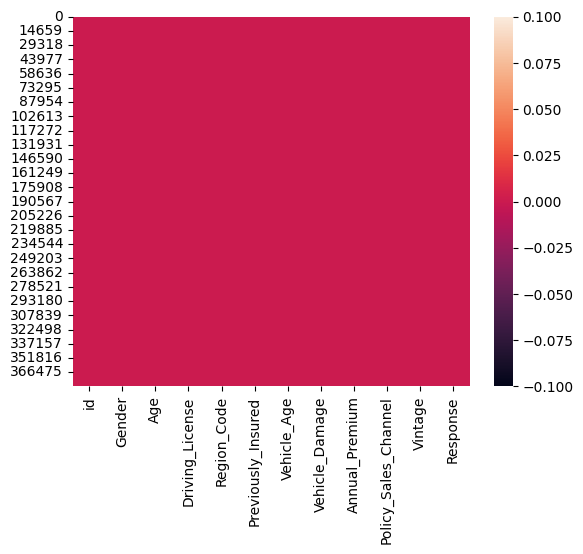

In [8]:
#to visualize missing values
sns.heatmap(df.isnull())

In [9]:
#2. Checking for duplicates
df.duplicated().sum()
#no duplicate rows

np.int64(0)

In [10]:
#3.changing data types if required
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


'Region_Code' and 'Policy_Sales_Channel' are in float data type hence converting to int.

In [11]:
df.sample()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
218417,218418,Female,40,1,8.0,0,1-2 Year,Yes,24983.0,4.0,64,0


In [12]:
df['Region_Code']=df['Region_Code'].astype(int)#as all values are whole numbers
df['Policy_Sales_Channel']=df['Policy_Sales_Channel'].astype(int)

In [13]:
#4.Creating new columns but keeing original for better  numerical analysis
df["Driving_License_Label"] = df["Driving_License"].map({1: "Yes", 0: "No"})
df["Response_Label"] = df["Response"].map({1: "Yes", 0: "No"})

In [14]:
df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [15]:
#5.New age group column
df['Age_Group']=pd.cut(x=df['Age'],bins=[20,30,50,85],labels=['Young','Middle-Aged','Senior'])

In [16]:
df.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Driving_License_Label,Response_Label,Age_Group
0,1,Male,44,1,28,0,> 2 Years,Yes,40454.0,26,217,1,Yes,Yes,Middle-Aged
1,2,Male,76,1,3,0,1-2 Year,No,33536.0,26,183,0,Yes,No,Senior
2,3,Male,47,1,28,0,> 2 Years,Yes,38294.0,26,27,1,Yes,Yes,Middle-Aged


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   id                     381109 non-null  int64   
 1   Gender                 381109 non-null  object  
 2   Age                    381109 non-null  int64   
 3   Driving_License        381109 non-null  int64   
 4   Region_Code            381109 non-null  int64   
 5   Previously_Insured     381109 non-null  int64   
 6   Vehicle_Age            381109 non-null  object  
 7   Vehicle_Damage         381109 non-null  object  
 8   Annual_Premium         381109 non-null  float64 
 9   Policy_Sales_Channel   381109 non-null  int64   
 10  Vintage                381109 non-null  int64   
 11  Response               381109 non-null  int64   
 12  Driving_License_Label  381109 non-null  object  
 13  Response_Label         381109 non-null  object  
 14  Age_Group           

<Axes: ylabel='Age'>

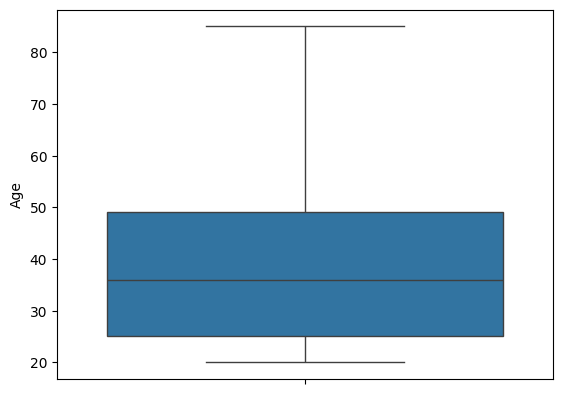

In [18]:
#6. to check outliers
sns.boxplot(df['Age'])

No outliers in this column

<Axes: ylabel='Annual_Premium'>

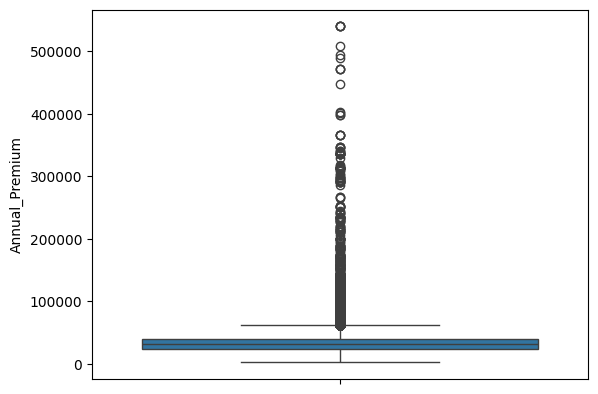

In [19]:
sns.boxplot(df['Annual_Premium'])

This column contains plenty of outliers

<Axes: ylabel='Policy_Sales_Channel'>

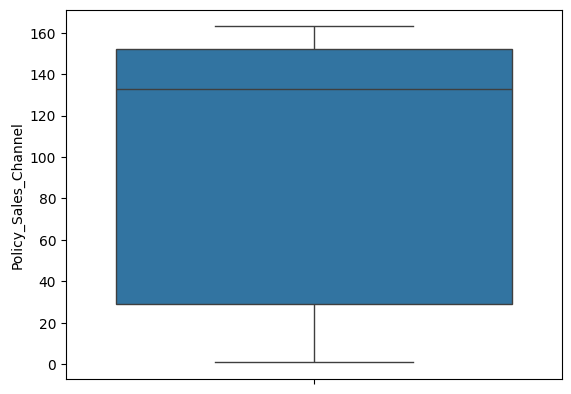

In [20]:
sns.boxplot(df['Policy_Sales_Channel'])#no outliers

<Axes: ylabel='Vintage'>

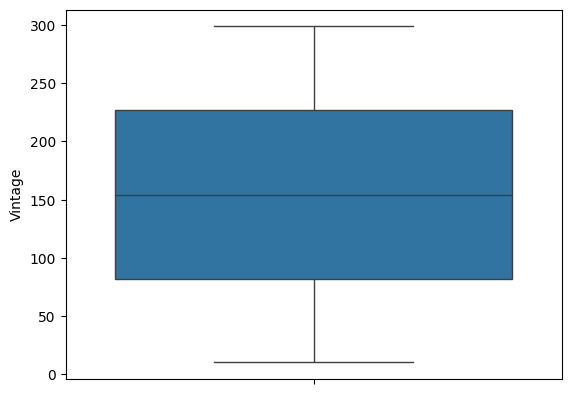

In [21]:
sns.boxplot(df['Vintage'])#no outliers

IQR  METHOD- HANDLE OUTLIERS

In [22]:
q1=df['Annual_Premium'].quantile(0.25)
q3=df['Annual_Premium'].quantile(0.75)
iqr=q3-q1
upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)
df['Annual_Premium']=np.where(df['Annual_Premium']>upper_bound,upper_bound,
            np.where(df['Annual_Premium']<lower_bound,lower_bound,
                     df['Annual_Premium']))

<Axes: ylabel='Annual_Premium'>

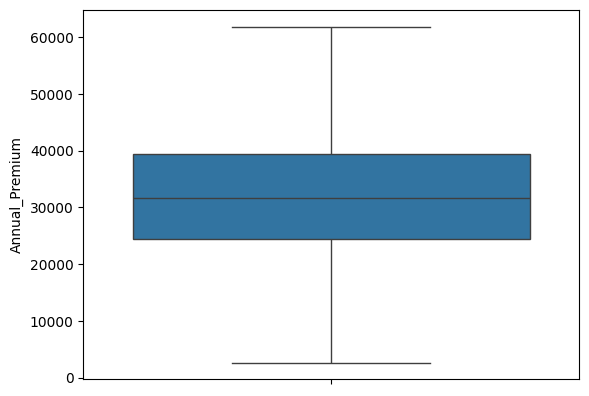

In [23]:
sns.boxplot(df['Annual_Premium'])#handled outliers

##Step 4: DATA VISUALIZATION

Utilize various visualization techniques to explore the distribution of key
variables.

In [24]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Driving_License_Label',
       'Response_Label', 'Age_Group'],
      dtype='object')

Step 1: Identify Key Variables to Visualize
3 types of variables:

1. Categorical Variables (e.g., Gender, Vehicle_Age, Previously_Insured, Vehicle_Damage)

i. Bar charts, Pie charts, Countplots

2. Numerical Variables (e.g., Age, Annual_Premium, Vintage)

i. Histograms, Boxplots, KDE plots

3. Relationships Between Variables

i.Scatter plots, Correlation heatmaps, Pairplots

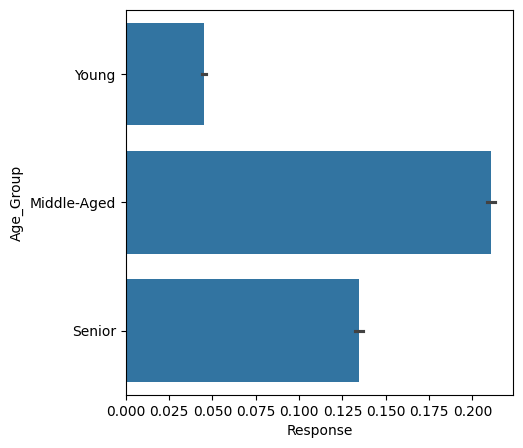

In [25]:
#Which age group claims Insurance more?
plt.figure(figsize=(5,5))
sns.barplot(x=df['Response'],y=df['Age_Group'])
plt.show()

Middle Age people (age between 30 to 50) claims Insurance more.

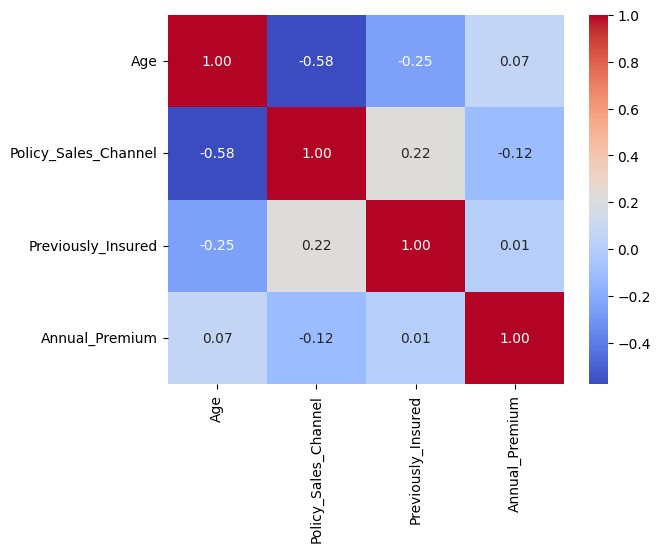

In [26]:
columns=['Age','Policy_Sales_Channel','Previously_Insured','Annual_Premium']
sns.heatmap(df[columns].corr(),annot=True,fmt=".2f",cmap="coolwarm")
plt.show()

##DATA ANALYSIS

STEP 5:FEATURE ANALYSIS

 Examine the relationship between features and the target variable (insurance
 claims)

Feature	Type:

1.Age-Are older people claiming more?
2.Gender-Do males or females claim more?
3.Previously_Insured-Does past insurance history affect claims?
4.Vehicle_Age-Do older vehicles claim more often?
5.Vehicle_Damage-Is past vehicle damage linked to claims?
6.Annual_Premium-Do people with higher premiums claim more?
7.Region_Code-Are claims higher in certain regions?
8.Policy_Sales_Channel- Does the sales channel influence claims?
9.Vintage (policy age)-Do long-term customers claim more?


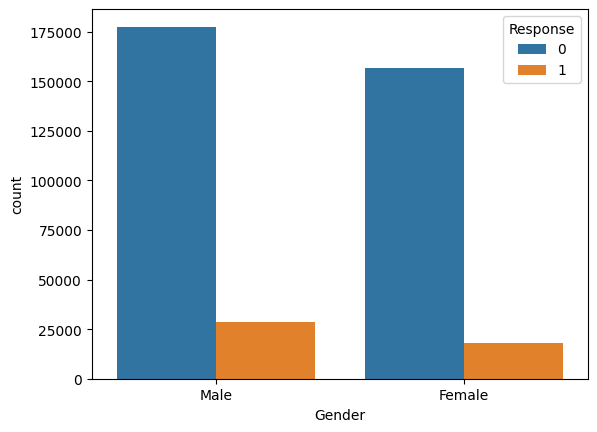

In [27]:
#1.this is done in Age analysis
#2.Gender-Do males or females claim more?
sns.countplot(x=df['Gender'],hue=df['Response'],data=df)
plt.show()

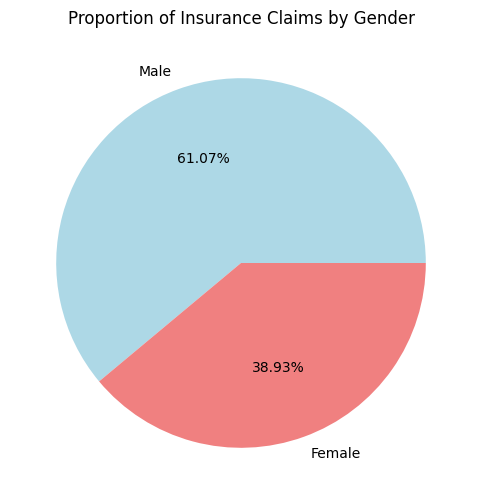

In [28]:
#1.this is done in Age analysis
#2.Gender-Do males or females claim more?
plt.figure(figsize=(6,6))
df[df['Response']==1]['Gender'].value_counts().plot.pie(autopct="%.2f%%",colors=["lightblue", "lightcoral"])
plt.title("Proportion of Insurance Claims by Gender")
plt.ylabel("")
plt.show()

Findings: Males(about 61.07%) found to claim for Vehicle Insurance more than Females(38.93%).

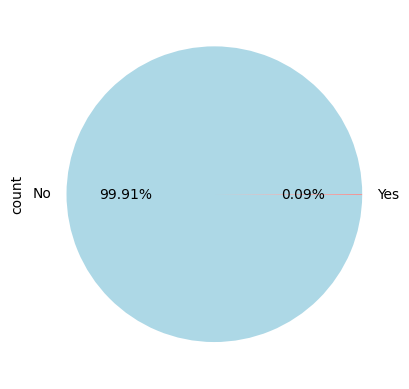

In [29]:
#3.Previously_Insured-Does past insurance history affect claims?
df[df['Previously_Insured']==1]['Response_Label'].value_counts().plot.pie(autopct="%.2f%%",colors=["lightblue", "lightcoral"])
plt.show()

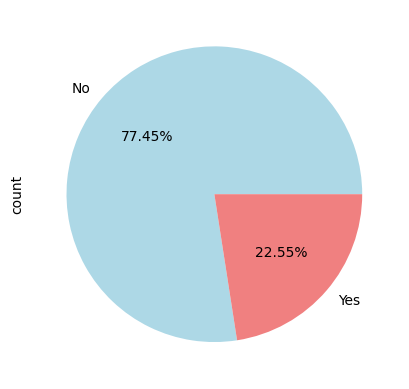

In [30]:
#3.Previously_Insured-Does past insurance history affect claims?
df[df['Previously_Insured']==0]['Response_Label'].value_counts().plot.pie(autopct="%.2f%%",colors=["lightblue", "lightcoral"])
plt.show()

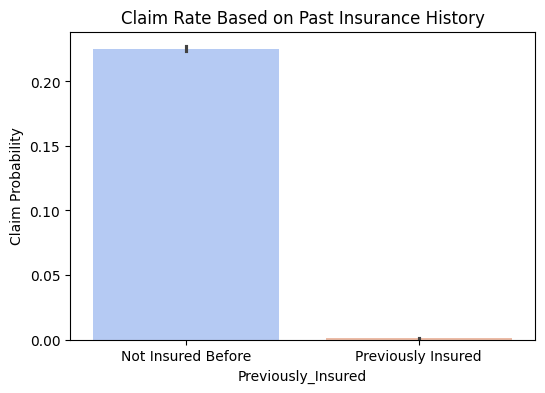

In [31]:
plt.figure(figsize=(6,4))
sns.barplot(x="Previously_Insured", y="Response", data=df, palette="coolwarm")
plt.xticks(ticks=[0,1], labels=["Not Insured Before", "Previously Insured"])
plt.title("Claim Rate Based on Past Insurance History")
plt.ylabel("Claim Probability")
plt.show()

The above two analysis shows that people who are not insured before tends to claim for vehicle insurance more than those who are previously insured.
People who are previously insured have claim only 0.09% for vehicle and 99.91% have not claim.
People who are not previously insured have claim 22.55%

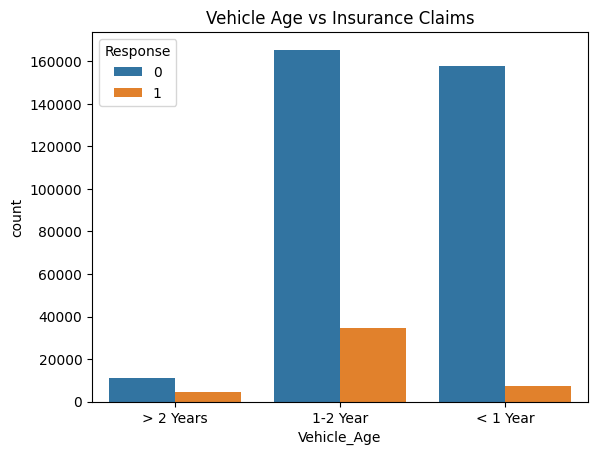

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vehicle Age vs Insurance Claims
sns.countplot(x=df["Vehicle_Age"], hue=df["Response"])
plt.title("Vehicle Age vs Insurance Claims")
plt.show()

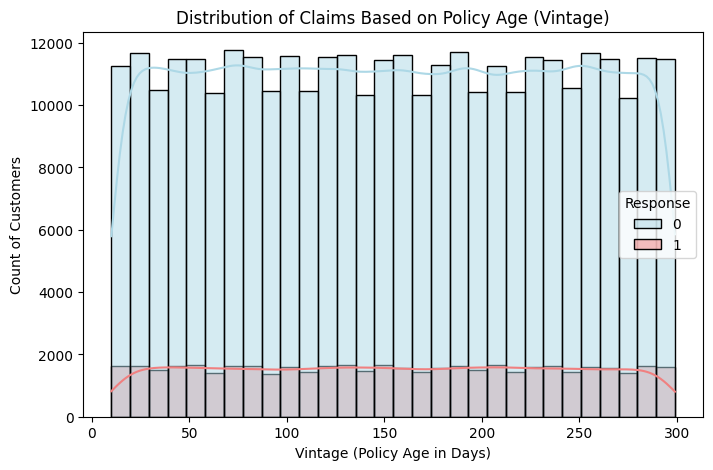

In [33]:
#9.Vintage (policy age)-Do long-term customers claim more?
plt.figure(figsize=(8,5))
sns.histplot(df, x="Vintage", hue="Response", bins=30, kde=True, palette=["lightblue", "lightcoral"])
plt.title("Distribution of Claims Based on Policy Age (Vintage)")
plt.xlabel("Vintage (Policy Age in Days)")
plt.ylabel("Count of Customers")
plt.show()

Policy duration or long term customers does not necessarily promise more claims as there is uniform distribution.

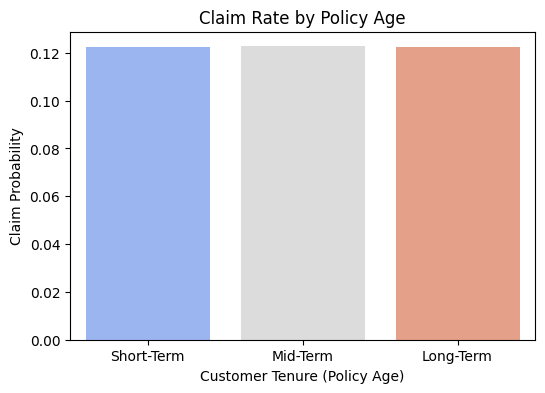

In [34]:
# Define vintage categories
df["Vintage_Category"] = pd.cut(df["Vintage"], bins=[0, 100, 200, 300], labels=["Short-Term", "Mid-Term", "Long-Term"])

# Calculate claim rates per category
claim_rates = df.groupby("Vintage_Category")["Response"].mean()

plt.figure(figsize=(6,4))
sns.barplot(x=claim_rates.index, y=claim_rates.values, palette="coolwarm")

plt.title("Claim Rate by Policy Age")
plt.xlabel("Customer Tenure (Policy Age)")
plt.ylabel("Claim Probability")
plt.show()

STEP 6: AGE DISTRIBUTION

Analyze the age distribution within the dataset and its impact on insurance
claims

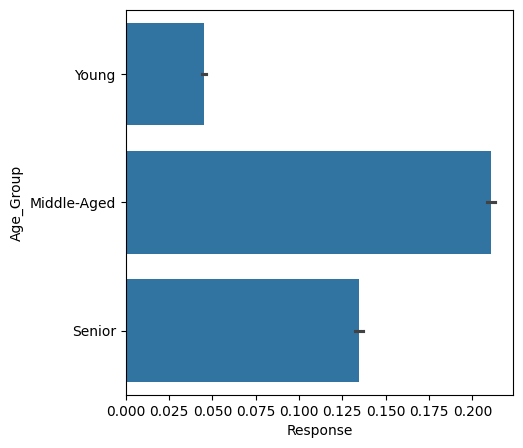

In [35]:
#Which age group claims Insurance more?
plt.figure(figsize=(5,5))
sns.barplot(x=df['Response'],y=df['Age_Group'])
plt.show()

STEP 7: PREMIUM ANALYSIS
Investigate the distribution of insurance premiums and their correlation with
claim frequencies

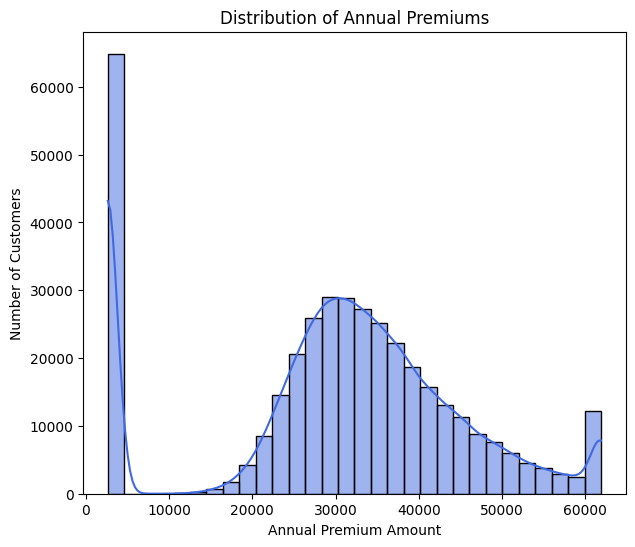

In [36]:
#to see distribution of premiums
plt.figure(figsize=(7,6))
sns.histplot(df['Annual_Premium'],kde=True,bins=30, color="royalblue")
plt.title("Distribution of Annual Premiums")
plt.xlabel("Annual Premium Amount")
plt.ylabel("Number of Customers")
plt.show()

1. Peak at a Very Low Premium (~ ₹3,000 to ₹5,000)(leftmost)
A huge number of customers are paying very low premiums (leftmost peak).
This could indicate that the insurance provider has a basic, low-cost policy that attracts many customers.

2. Main Distribution Around ₹20,000 - ₹40,000
The biggest cluster of customers (majority) falls in the range of ₹20,000 - ₹40,000.

This means most policyholders prefer mid-range premium plans.

The distribution is slightly skewed to the right, meaning a few customers pay significantly higher premiums.

3. Long Tail (Right Skewed) - Fewer High-Premium Customers (₹50,000 - ₹60,000+)
A small number of customers pay very high premiums (right end of the graph).

This is expected, as only a few high-income customers might opt for premium insurance packages.

4. Small Peak at ₹60,000 - Possible Special Policy or Data Issue
There is a small spike around ₹60,000, which is unusual.

A special insurance product exists at this price.
A corporate plan or premium package targeted at businesses.

In [37]:
# Calculate correlation
correlation = df['Annual_Premium'].corr(df['Response'])
print(f"Correlation between Premium and Claim Response: {correlation:.2f}")

Correlation between Premium and Claim Response: 0.02


A value of 0.02 is very close to 0, indicating a very weak relationship or no relationship at all.


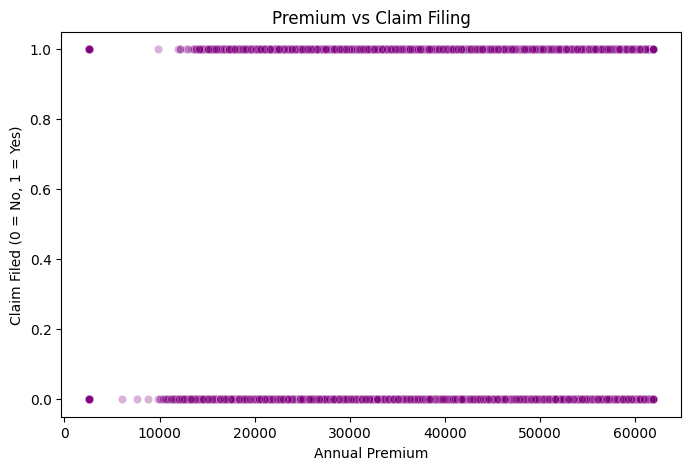

In [38]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Annual_Premium"], y=df["Response"], alpha=0.3, color="purple")

plt.title("Premium vs Claim Filing")
plt.xlabel("Annual Premium")
plt.ylabel("Claim Filed (0 = No, 1 = Yes)")
plt.show()

There is no clear upward or downward trend in the scatter plot.

The distribution of claim filings seems uniform across different premium values.

This suggests that premium amount may not strongly influence whether a customer files a claim.

If claims were concentrated in a certain premium range, it would indicate a correlation.

Here, claims are spread across all premium amounts, meaning claim filing is not heavily dependent on premium amount.

STEP 8: Claim Frequencies: Explore factors contributing to higher claim frequencies

STEP 9:Gender Analysis: Investigate the role of gender in insurance claims

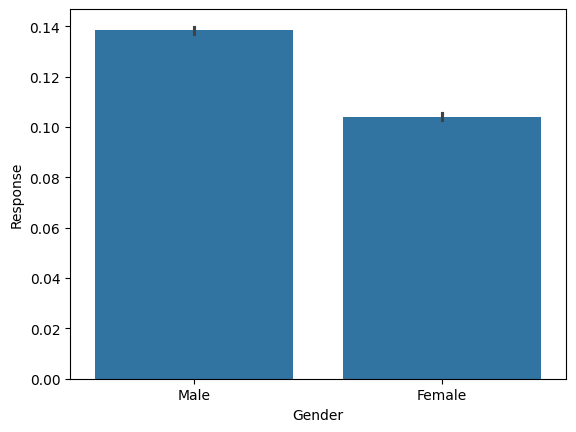

In [39]:
sns.barplot(x=df['Gender'],y=df['Response'],data=df)
plt.show()

STEP 10:Vehicle Age and Claims:
 Examine the impact of vehicle age on the likelihood of a claim

In [40]:
print(df['Vehicle_Age'].value_counts())

Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64


The majority of vehicles are between 1-2 years old.

The fewest vehicles are older than 2 years.

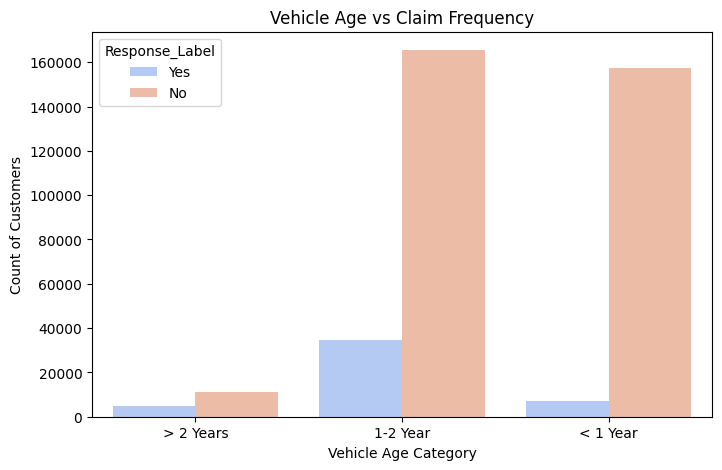

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Vehicle_Age", hue="Response_Label", palette="coolwarm")
plt.title("Vehicle Age vs Claim Frequency")
plt.xlabel("Vehicle Age Category")
plt.ylabel("Count of Customers")
plt.show()

This graph shows the absolute number of vehicles in each age category, split by whether they filed a claim (Yes) or not (No).

The majority of vehicles did not file claims (bars for No are taller in all categories).

However, older vehicles (>2 years) have a higher proportion of claims filed (Yes in blue) than newer ones.

Conclusion:

Older cars tend to require more insurance claims.

This could be due to wear and tear, mechanical failures, or increased risk of accidents in aging vehicles.

Newer vehicles might have fewer technical issues and better safety features, leading to fewer claims.

In [42]:
vehicle_age_claims = df.groupby("Vehicle_Age")["Response"].mean() * 100
print(vehicle_age_claims)

Vehicle_Age
1-2 Year     17.375547
< 1 Year      4.370517
> 2 Years    29.374649
Name: Response, dtype: float64


This indicates that older vehicles (>2 Years) have the highest claim frequency, while new vehicles (<1 Year) have the lowest claim frequency.

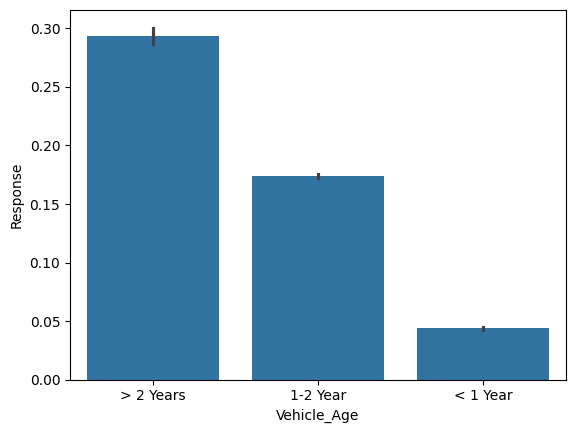

In [43]:
sns.barplot(x=df['Vehicle_Age'],y=df['Response'],data=df)
plt.show()

Older vehicles (>2 years) claim the most (≈30%), making them riskier for insurers.

STEP 11:Region-wise Analysis:Analyze regional patterns in insurance claims

In [44]:
# Calculate claim rate (Response=1) for each Region_Code
region_claims = df.groupby("Region_Code")["Response"].mean().reset_index()
region_claims.columns = ["Region_Code", "Claim_Responses"]
region_claims = region_claims.sort_values(by="Claim_Responses", ascending=False)
print(region_claims.head(10))  # Check top 10 regions wh highest claims

    Region_Code  Claim_Responses
38           38         0.192004
28           28         0.187163
19           19         0.162866
4             4         0.158245
23           23         0.153061
51           51         0.153005
24           24         0.141615
7             7         0.131747
18           18         0.131574
3             3         0.127662


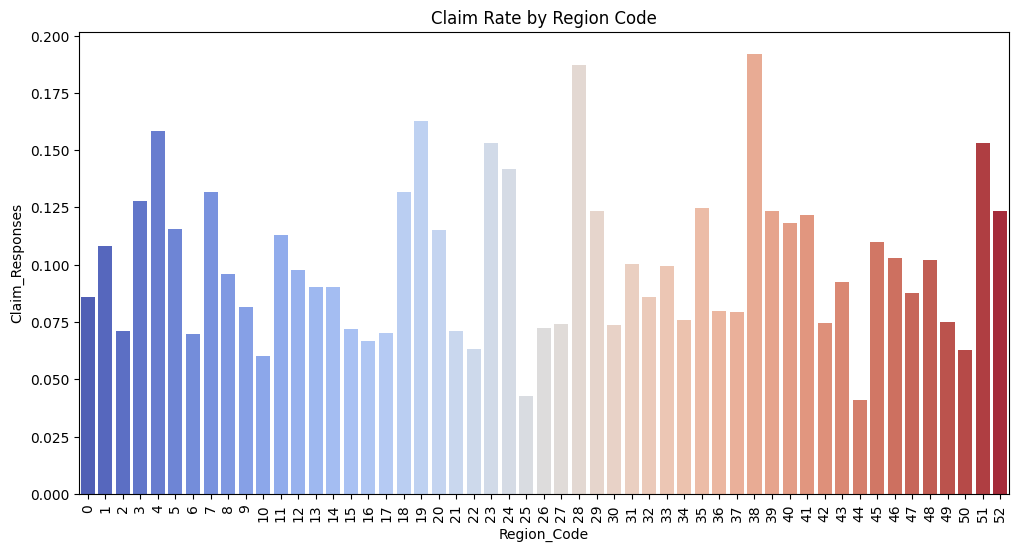

In [45]:
plt.figure(figsize=(12,6))
sns.barplot(x="Region_Code", y="Claim_Responses", data=region_claims, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Claim Rate by Region Code")
plt.show()

Majority of People of Region code 38 (and then 28)have claimed for insurance more.

STEP 12: Claim Frequency by Vehicle Damage:
 Investigate the relationship between vehicle damage and claim frequencies

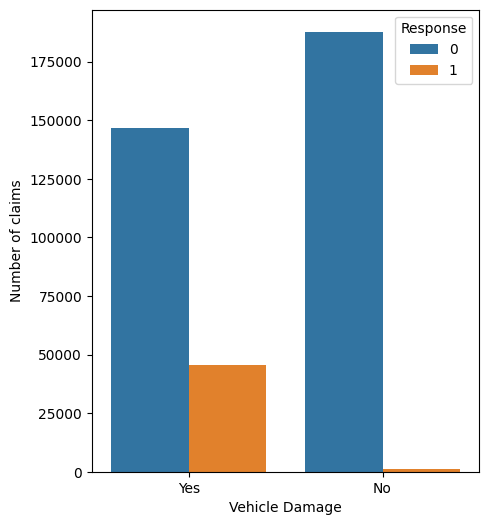

In [46]:
#to find out the insurance claim total counts
plt.figure(figsize=(5,6))
sns.countplot(x=df['Vehicle_Damage'],hue=df['Response'],data=df)
plt.xlabel("Vehicle Damage")
plt.ylabel("Number of claims")
plt.show()


In [47]:
vehicle_damage_claims=df.groupby('Vehicle_Damage')['Response'].mean()*100
print(vehicle_damage_claims)

Vehicle_Damage
No      0.520414
Yes    23.765546
Name: Response, dtype: float64


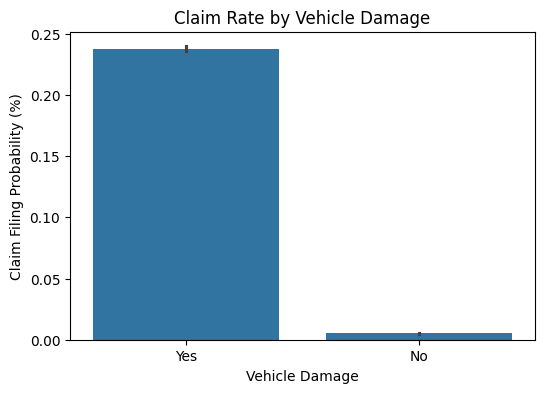

In [48]:
plt.figure(figsize=(6,4))
sns.barplot(x=df['Vehicle_Damage'], y=df['Response'], data=df)
plt.title("Claim Rate by Vehicle Damage")
plt.xlabel("Vehicle Damage")
plt.ylabel("Claim Filing Probability (%)")
plt.show()

The vehicles damaged has significantly higher rate of insurance claims than vehicle which are not damaged.

STEP 13:  Customer Loyalty:
Analyze if the number of policies held by a customer influences claim
likelihood

In [49]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Driving_License_Label',
       'Response_Label', 'Age_Group', 'Vintage_Category'],
      dtype='object')

In [50]:
policy_claims = df.groupby("Policy_Sales_Channel")["Response"].mean() * 100
print(policy_claims)

Policy_Sales_Channel
1       3.258845
2      25.000000
3      30.401530
4      20.039293
6       0.000000
         ...    
157    26.840215
158    27.439024
159     1.960784
160     2.181000
163    30.418251
Name: Response, Length: 155, dtype: float64


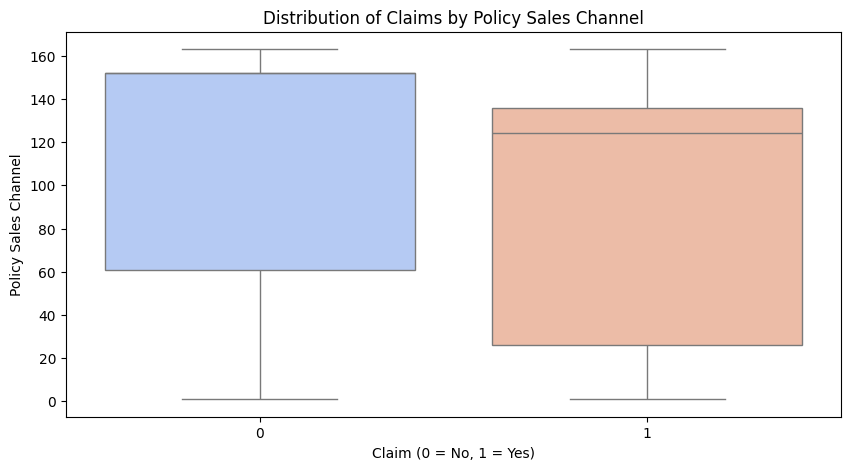

In [54]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Response'], y=df['Policy_Sales_Channel'], data=df, palette="coolwarm")
plt.title("Distribution of Claims by Policy Sales Channel")
plt.xlabel("Claim (0 = No, 1 = Yes)")
plt.ylabel("Policy Sales Channel")
plt.show()

Claimers are more concentrated in specific sales channels.(between 20 to 130)
The “middle 50%” of claimers are linked to lower-numbered sales channels.
The “middle 50%” of non-claimers are linked to higher-numbered sales channels.
Non-claimers buy from many different policy sales channels.
Claimers tend to come from specific channels.Some channels have extreme cases—either very high or very low claim rates.

STEP 14:Time Analysis:
 If applicable, explore temporal patterns in insurance claims.

In [55]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Driving_License_Label',
       'Response_Label', 'Age_Group', 'Vintage_Category'],
      dtype='object')

In [56]:
#there is not time or date column so, trying  to do with Vintage column
print(df['Vintage'].describe())

count    381109.000000
mean        154.347397
std          83.671304
min          10.000000
25%          82.000000
50%         154.000000
75%         227.000000
max         299.000000
Name: Vintage, dtype: float64


In [57]:
policy_frequency_claims=df.groupby('Vintage')['Response'].mean()
policy_frequency_claims

,Response
Vintage,
10,0.112128
11,0.142113
12,0.131265
13,0.138450
14,0.123810
...,...
295,0.123137
296,0.119816
297,0.110592


In [59]:
# Categorize Vintage into groups
df['Vintage_Category'] = pd.cut(df['Vintage'], bins= [0,60,120,180,240,300], labels= ["0-60 Days", "60-120 Days", "120-180 Days", "180-240 Days", "240-300 Days"])

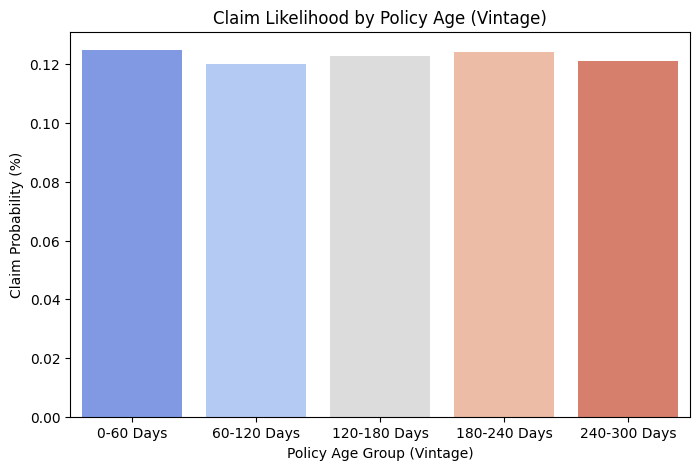

In [60]:
vintage_claims = df.groupby('Vintage_Category')['Response'].mean()

# Plot the results
plt.figure(figsize=(8,5))
sns.barplot(x=vintage_claims.index, y=vintage_claims.values, palette="coolwarm")
plt.title("Claim Likelihood by Policy Age (Vintage)")
plt.xlabel("Policy Age Group (Vintage)")
plt.ylabel("Claim Probability (%)")
plt.show()

Policyholders with newly issued or older policies have nearly the same likelihood of filing a claim.

There is no strong correlation between policy age and claim probability.

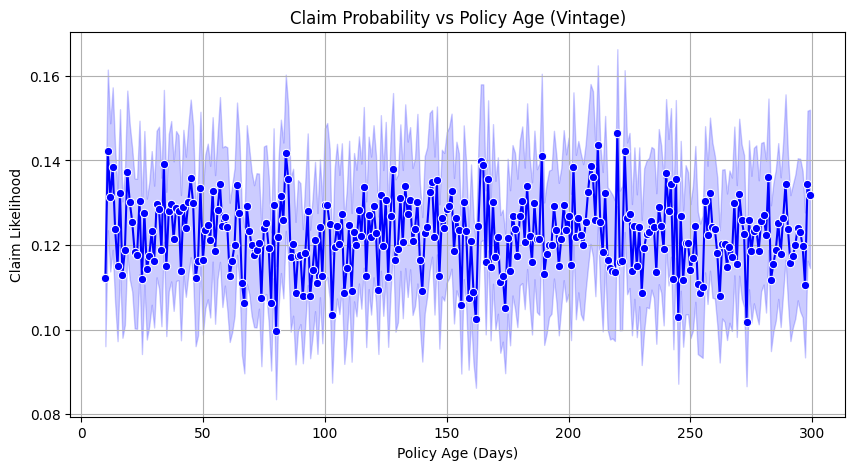

In [61]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df["Vintage"], y=df["Response"], marker="o", color='b')
plt.title("Claim Probability vs Policy Age (Vintage)")
plt.xlabel("Policy Age (Days)")
plt.ylabel("Claim Likelihood")
plt.grid()
plt.show()

The claim probability remains relatively stable over time.

There is no clear upward or downward trend in claim likelihood with policy age.

Policy age (vintage) does not have a strong impact on claim probability.

Key Findings & Insights:
1. Middle-aged individuals (30-50 years) claim insurance more often.
2. Males (61.07%) claim more than females (38.93%).
3. Previously insured customers have a low claim rate (0.09%).
Those not previously insured are 22.55% more likely to claim.
4. Vehicle Condition Matters: Damaged vehicles have a significantly higher claim rate than undamaged ones.
5. Long-term customers do not necessarily file more claims.
The claim probability remains stable over time (no upward/downward trend).
6. Peak at Low Premiums (~₹3K-₹5K): Many customers opt for basic, affordable plans.

  Main Cluster (₹20K-₹40K): Majority prefer mid-range premium plans.

  Right-Skewed Distribution: A small segment pays very high premiums (~₹50K+).

  Claim Probability is Uniform Across Premiums—premium amount does not strongly influence claims.
7. Region Code 38 & 28 have the highest claims.
8. Claimers are more concentrated in specific sales channels (between 20-130).


Final Takeaways:
1.Claims are influenced by multiple factors—previous insurance status, vehicle damage, age group, and sales channels.
2.Policy duration or vintage does not dictate claim frequency.
3.Premium amount does not strongly impact claim likelihood.